## Figure 3 NPGO Paper

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

### SST -- data are from CentralSoG_SST_Data.ipynb

In [2]:
NPGO_C_SST=[ 6.41475627,  6.48755541,  7.4785702 ,  9.25347408, 12.63790333,
       15.98057834, 18.54948443, 19.06939349, 15.93989528, 12.02364599,
        9.0698088 ,  6.8426298 ]

In [3]:
NPGO_C_SST_SEM=[0.21721438, 0.33888804, 0.33143871, 0.15566903, 0.06565611,
       0.28891357, 0.22434856, 0.30571173, 0.24001654, 0.23185627,
       0.14982848, 0.25240781]

In [4]:
NPGO_W_SST=[ 6.54155677,  6.32416194,  7.75323583, 10.39172893, 14.8838251 ,
       17.22590977, 19.5343776 , 19.48116382, 16.07562534, 12.52031955,
        9.00751125,  7.22206359]

In [5]:
NPGO_W_SST_SEM=[0.10085818, 0.4890846 , 0.37887922, 0.15664109, 0.40595597,
       0.20241134, 0.40119105, 0.67801848, 0.50271186, 0.33871933,
       0.18173575, 0.33064517]

In [6]:
Spring_C_SST=[ 9.78365537, 10.22426138,  9.4735278 ,  9.67848561]

In [7]:
Spring_W_SST=[11.72465165, 11.13348375, 10.47916834, 10.70108273]

In [8]:
Summer_C_SST=[17.50388524, 17.87908419, 18.36135449, 17.72161776]

In [9]:
Summer_W_SST=[17.94220457, 19.22289418, 19.45471819, 18.36878465]

### Salinity -- data are from CentralSoG_SSS_Data.ipynb

In [10]:
NPGO_C_Sal= [25.50095144, 24.93931884, 25.66983048, 24.71296806, 18.50090254,
       13.74989501, 15.83386163, 18.77032177, 22.11775614, 23.80291518,
       23.92629601, 24.63696603]

In [11]:
NPGO_C_Sal_SEM=[0.25090128, 0.34827499, 0.22707056, 0.53063788, 1.29902834,
       1.59029185, 2.24347327, 0.97587449, 0.3152079 , 0.52615727,
       0.41454268, 0.26008036]

In [12]:
NPGO_W_Sal=[24.16407734, 24.02108627, 23.46290609, 21.96345317, 15.89424179,
       14.72397722, 16.48597299, 19.74857647, 22.7618917 , 23.66667069,
       22.93491948, 23.81730112]

In [13]:
NPGO_W_Sal_SEM=[0.8826463 , 0.99281972, 0.94991001, 0.90580449, 1.61168061,
       1.24163564, 1.76138473, 1.28528857, 0.81950455, 0.49974175,
       0.69538148, 1.10459364]

In [14]:
Spring_C_Sal=[23.34870235, 23.97076454, 21.99257067, 22.53289721]

In [15]:
Spring_W_Sal=[18.47972066, 20.29101052, 22.52859016, 20.46148007]

In [16]:
Summer_C_Sal=[18.59444785, 18.55219596, 14.78432114, 12.54113959]

In [17]:
Summer_W_Sal=[20.58331684, 16.97778168, 16.03245907, 14.35114464]

### Halocline Strength -- data are from CentralSoG_Halocline_Data.ipynb

In [18]:
NPGO_C_Halo= [0.36154052, 0.49809309, 0.35279773, 0.59444239, 2.17599837,
       2.83692228, 2.06920697, 1.88577881, 1.31863951, 0.84843678,
       0.58477922, 0.50166281]

In [19]:
NPGO_C_Halo_SEM=[0.0425931 , 0.06372294, 0.0536515 , 0.10031701, 0.37381109,
       0.46136078, 0.39131849, 0.18637298, 0.09991184, 0.06102145,
       0.08902362, 0.0766228]

In [20]:
NPGO_W_Halo=[0.60806095, 0.64845463, 0.75646377, 1.24462616, 2.71714942,
       2.62485502, 2.29233551, 1.82686781, 1.266163  , 0.91992592,
       1.10688201, 0.64399621]

In [21]:
NPGO_W_Halo_SEM=[0.10139684, 0.21724346, 0.11031644, 0.11941914, 0.33992397,
       0.31827148, 0.46300932, 0.33271079, 0.15843871, 0.11012063,
       0.17339882, 0.12728148]

In [22]:
Spring_C_Halo=[1.02274943, 0.78320406, 1.33834988, 1.02001461]

In [23]:
Spring_W_Halo=[1.787881  , 1.68205798, 1.24675077, 1.57429606]

In [24]:
Summer_C_Halo=[1.76022024, 1.88017547, 2.33848005, 3.07700164]

In [25]:
Summer_W_Halo=[1.3562591 , 2.24361753, 2.58961049, 2.80259067]

### PAR -- data are from CentralSoG_SurfacePAR_Data.ipynb

In [26]:
NPGO_C_PAR= [12.04400661, 23.23528714, 36.51879487, 54.5113959 , 76.02100952,
       87.81722026, 99.97068933, 86.76086059, 61.21366767, 31.11335206,
       15.38539501, 10.86040996]

In [27]:
NPGO_C_PAR_SEM=[0.98927229, 0.80121518, 2.21281148, 2.65062751, 4.36595316,
       6.5682177 , 3.54313251, 2.28383506, 2.1619708 , 1.18555839,
       0.89343873, 1.10119006]

In [28]:
NPGO_W_PAR=[12.32470128, 26.11127048, 45.67482302, 63.15013291, 91.98044567,
       93.73015807, 98.88877244, 82.78904517, 55.05779156, 33.1923411 ,
       18.17157652,  9.76882253]

In [29]:
NPGO_W_PAR_SEM=[1.47123463, 0.57532029, 3.05257932, 2.50705727, 4.39118173,
       5.75917672, 2.30639185, 2.69061531, 2.1721261 , 0.98056129,
       1.51775549, 0.60773262]

In [30]:
Spring_C_PAR=[61.90657111, 52.45042499, 52.51039674, 55.86754087]

In [31]:
Spring_W_PAR=[66.25929667, 68.03363515, 68.91267142, 64.53493222]

In [32]:
Summer_C_PAR=[91.57734924, 97.41059098, 94.13498441, 82.94210228]

In [33]:
Summer_W_PAR=[94.68697684, 93.73494871, 92.82362585, 85.96508285]

### Wind -- data are from HRDPSWinds_Data.ipynb

In [34]:
NPGO_C_Wind= [5.503117561340332, 5.190681457519531, 5.546851634979248, 4.699765205383301, 4.319005012512207, 4.160552978515625, 4.251698970794678, 4.14553689956665, 4.074483394622803, 4.822423458099365, 5.530994415283203, 5.60904598236084]


In [35]:
NPGO_C_Wind_SEM=[0.2716546654701233, 0.3555466830730438, 0.3046501874923706, 0.3556775450706482, 0.13578826189041138, 0.07550367712974548, 0.2988617420196533, 0.17373867332935333, 0.12545664608478546, 0.018483856692910194, 0.17944231629371643, 0.45889315009117126]


In [36]:
NPGO_W_Wind=[5.133814334869385, 4.842380046844482, 3.766061544418335, 4.423320770263672, 3.550428867340088, 4.039124488830566, 3.807666540145874, 3.829700469970703, 4.08309268951416, 4.191368103027344, 4.611095428466797, 5.599612236022949]


In [37]:
NPGO_W_Wind_SEM=[0.6975691318511963, 0.7239692807197571, 0.24488499760627747, 0.2416556030511856, 0.17904892563819885, 0.24562996625900269, 0.24054600298404694, 0.2916531264781952, 0.2151043862104416, 0.1926278918981552, 0.35777175426483154, 0.44312936067581177]

In [38]:
Spring_C_Wind=[5.546851634979248, 4.699765205383301, 4.319005012512207]

In [39]:
Spring_W_Wind=[3.766061544418335, 4.423320770263672, 3.550428867340088]

In [40]:
Summer_C_Wind=[4.160552978515625, 4.251698970794678, 4.14553689956665]

In [41]:
Summer_W_Wind=[4.039124488830566, 3.807666540145874, 3.829700469970703]

### Fraser River Flow -- data are from FraserRiverFlow_Data.ipynb

In [42]:
NPGO_C_FR= [991.5 ,  983.25,  979.  , 1024.  , 1077.  , 1012.5 ,  979.5 ,
        977.  ,  985.75, 1018.5 , 1066.25, 1114.  , 1071.  , 1102.5 ,
       1125.  , 1145.  , 1126.25, 1029.25,  952.  ,  929.5 ,  914.  ,
        883.  ,  883.  ,  899.75,  910.75,  913.5 ,  920.75,  928.5 ,
        941.  ,  922.  ,  901.75,  895.5 ,  910.5 ,  914.  ,  945.  ,
        966.  ,  960.75,  956.25,  934.75,  920.5 ,  910.5 ,  900.25,
        907.5 ,  925.25,  937.75,  935.25,  912.  ,  905.  ,  894.75,
        877.75,  857.25,  847.25,  864.75,  848.75,  850.  ,  840.75,
        814.5 ,  810.5 ,  824.  ,  816.5 ,  836.75,  835.5 ,  832.5 ,
        851.75,  874.25,  865.5 ,  859.5 ,  859.25,  865.  ,  878.25,
        896.25,  900.75,  894.75,  888.5 ,  905.75,  924.25,  911.5 ,
        919.25,  921.  ,  916.75,  920.  ,  916.  ,  917.25,  925.  ,
        928.75,  944.75,  974.5 , 1024.5 , 1056.25, 1132.5 , 1159.5 ,
       1154.75, 1111.  , 1119.75, 1106.25, 1104.25, 1081.  , 1099.  ,
       1100.25, 1109.  , 1139.75, 1162.25, 1187.5 , 1231.5 , 1275.75,
       1397.5 , 1497.5 , 1610.  , 1672.5 , 1777.5 , 1895.  , 2002.5 ,
       2102.5 , 2212.5 , 2307.5 , 2387.5 , 2452.5 , 2557.5 , 2697.5 ,
       2952.5 , 3150.  , 3280.  , 3315.  , 3355.  , 3460.  , 3520.  ,
       3560.  , 3607.5 , 3632.5 , 3687.5 , 3752.5 , 3850.  , 3960.  ,
       4250.  , 4480.  , 4645.  , 4842.5 , 5117.5 , 5562.5 , 6075.  ,
       6472.5 , 6757.5 , 6907.5 , 7037.5 , 7170.  , 7245.  , 7260.  ,
       7285.  , 7352.5 , 7442.5 , 7487.5 , 7552.5 , 7667.5 , 7755.  ,
       7580.  , 7530.  , 7627.5 , 7705.  , 7670.  , 7670.  , 7795.  ,
       8002.5 , 7987.5 , 7855.  , 7740.  , 7587.5 , 7560.  , 7695.  ,
       7895.  , 7742.5 , 7637.5 , 7717.5 , 7985.  , 8127.5 , 8080.  ,
       7945.  , 7850.  , 7952.5 , 7982.5 , 7932.5 , 7785.  , 7562.5 ,
       7507.5 , 7575.  , 7562.5 , 7422.5 , 7297.5 , 7267.5 , 7200.  ,
       7102.5 , 6985.  , 7025.  , 7115.  , 7112.5 , 6925.  , 6660.  ,
       6432.5 , 6280.  , 6225.  , 6100.  , 5907.5 , 5745.  , 5642.5 ,
       5542.5 , 5542.5 , 5515.  , 5402.5 , 5242.5 , 5092.5 , 4947.5 ,
       4827.5 , 4712.5 , 4635.  , 4597.5 , 4552.5 , 4500.  , 4417.5 ,
       4245.  , 4062.5 , 3952.5 , 3872.5 , 3825.  , 3777.5 , 3690.  ,
       3622.5 , 3547.5 , 3537.5 , 3492.5 , 3360.  , 3265.  , 3227.5 ,
       3177.5 , 3152.5 , 3130.  , 3100.  , 3105.  , 3190.  , 3277.5 ,
       3210.  , 3050.  , 2947.5 , 2882.5 , 2770.  , 2730.  , 2712.5 ,
       2715.  , 2657.5 , 2577.5 , 2522.5 , 2457.5 , 2382.5 , 2360.  ,
       2320.  , 2235.  , 2137.5 , 2085.  , 2032.5 , 1995.  , 1982.5 ,
       1995.  , 1957.5 , 1952.5 , 1957.5 , 1917.5 , 1850.  , 1787.5 ,
       1780.  , 1770.  , 1917.5 , 2197.5 , 2210.  , 2202.5 , 2175.  ,
       2175.  , 2170.  , 2127.5 , 2045.  , 2065.  , 1970.  , 1967.5 ,
       1890.  , 1822.5 , 1817.5 , 1802.5 , 1792.5 , 1717.5 , 1660.  ,
       1655.  , 1737.5 , 1730.  , 1750.  , 1750.  , 1825.  , 1777.5 ,
       1730.  , 1782.5 , 1815.  , 1795.  , 1750.  , 1707.5 , 1680.  ,
       1657.5 , 1677.5 , 1695.  , 1682.5 , 1662.5 , 1587.5 , 1567.5 ,
       1597.5 , 1640.  , 1612.5 , 1625.  , 1630.  , 1630.  , 1627.5 ,
       1582.5 , 1647.5 , 1720.  , 1670.  , 1655.  , 1652.5 , 1642.5 ,
       1637.5 , 1580.  , 1502.5 , 1415.  , 1350.  , 1285.  , 1245.  ,
       1232.5 , 1382.5 , 1364.5 , 1335.  , 1315.  , 1320.  , 1357.5 ,
       1337.5 , 1310.  , 1272.5 , 1247.5 , 1205.  , 1181.  , 1165.  ,
       1160.  , 1170.  , 1222.5 , 1242.5 , 1192.5 , 1177.5 , 1122.5 ,
       1047.5 , 1004.75,  976.5 ,  943.5 ,  922.5 ,  920.25,  939.75,
        994.5 ,  969.75,  955.75,  954.  ,  995.75, 1014.75,  989.25,
        982.75]

In [43]:
NPGO_C_FR_Index=[ 1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365]

In [44]:
#NPGO_C_FR_SEM=[]

In [45]:
NPGO_W_FR=[1060.  , 1038.  , 1075.75, 1198.  , 1151.25, 1149.  , 1139.75,
       1166.75, 1140.  , 1137.5 , 1135.  , 1116.5 , 1089.25, 1015.5 ,
        988.25, 1001.25,  969.25, 1027.75, 1049.25, 1021.25, 1051.75,
       1068.  , 1085.25, 1197.25, 1218.25, 1183.75, 1166.25, 1184.25,
       1221.5 , 1288.25, 1318.75, 1714.  , 1476.25, 1362.25, 1263.25,
       1195.75, 1314.5 , 1371.75, 1309.5 , 1213.5 , 1171.75, 1136.5 ,
       1105.  , 1114.25, 1154.75, 1171.75, 1194.25, 1209.5 , 1225.25,
       1215.  , 1191.  , 1161.5 , 1141.5 , 1127.75, 1119.  , 1105.25,
       1074.75, 1055.5 , 1041.25, 1030.75, 1018.25,  995.5 ,  976.  ,
        947.5 ,  942.  ,  940.  ,  941.  ,  944.  ,  936.25,  929.75,
        956.  ,  984.  , 1073.  , 1151.5 , 1215.25, 1284.  , 1332.75,
       1340.75, 1315.75, 1330.25, 1339.  , 1393.25, 1433.  , 1431.75,
       1448.75, 1462.75, 1562.75, 1683.5 , 1964.  , 2157.  , 2218.  ,
       2250.  , 2281.  , 2223.75, 2142.  , 2092.5 , 2069.75, 2058.5 ,
       2046.5 , 2052.75, 2099.25, 2095.  , 2092.5 , 2112.5 , 2092.5 ,
       2052.5 , 2085.  , 2095.  , 2247.5 , 2387.5 , 2582.5 , 2770.  ,
       2957.5 , 3205.  , 3547.5 , 3775.  , 3880.  , 3992.5 , 4037.5 ,
       4090.  , 4262.5 , 4352.5 , 4392.5 , 4495.  , 4595.  , 4745.  ,
       4915.  , 4990.  , 5100.  , 5227.5 , 5442.5 , 5742.5 , 6022.5 ,
       6295.  , 6555.  , 6697.5 , 6840.  , 6992.5 , 7100.  , 7245.  ,
       7360.  , 7452.5 , 7615.  , 7787.5 , 7897.5 , 7980.  , 8030.  ,
       8067.5 , 8100.  , 8080.  , 7992.5 , 7927.5 , 7730.  , 7685.  ,
       7707.5 , 7682.5 , 7605.  , 7400.  , 7112.5 , 6835.  , 6597.5 ,
       6425.  , 6325.  , 6175.  , 6025.  , 5967.5 , 6017.5 , 6070.  ,
       6067.5 , 6145.  , 6130.  , 6072.5 , 6077.5 , 6117.5 , 6165.  ,
       6200.  , 6182.5 , 6165.  , 6227.5 , 6297.5 , 6262.5 , 6102.5 ,
       5997.5 , 5932.5 , 5842.5 , 5897.5 , 6040.  , 6060.  , 5982.5 ,
       5790.  , 5587.5 , 5485.  , 5392.5 , 5285.  , 5235.  , 5207.5 ,
       5140.  , 5032.5 , 4880.  , 4777.5 , 4852.5 , 4965.  , 4977.5 ,
       4875.  , 4762.5 , 4702.5 , 4570.  , 4460.  , 4410.  , 4350.  ,
       4217.5 , 4102.5 , 4002.5 , 3925.  , 3857.5 , 3805.  , 3780.  ,
       3777.5 , 3732.5 , 3632.5 , 3497.5 , 3390.  , 3330.  , 3255.  ,
       3187.5 , 3080.  , 3000.  , 2937.5 , 2915.  , 2850.  , 2805.  ,
       2802.5 , 2787.5 , 2785.  , 2732.5 , 2635.  , 2550.  , 2505.  ,
       2462.5 , 2432.5 , 2382.5 , 2360.  , 2312.5 , 2282.5 , 2235.  ,
       2167.5 , 2160.  , 2170.  , 2187.5 , 2240.  , 2230.  , 2147.5 ,
       2070.  , 2077.5 , 2105.  , 2127.5 , 2130.  , 2125.  , 2130.  ,
       2140.  , 2197.5 , 2182.5 , 2195.  , 2150.  , 2112.5 , 2177.5 ,
       2172.5 , 2287.5 , 2352.5 , 2350.  , 2362.5 , 2430.  , 2432.5 ,
       2370.  , 2292.5 , 2242.5 , 2150.  , 2062.5 , 2005.  , 1952.5 ,
       1925.  , 1882.5 , 1940.  , 2095.  , 2080.  , 2072.5 , 2257.5 ,
       2417.5 , 2377.5 , 2270.  , 2182.5 , 2137.5 , 2125.  , 2082.5 ,
       2027.5 , 1987.5 , 1922.5 , 1912.5 , 1910.  , 1880.  , 1977.5 ,
       2005.  , 1930.  , 1947.5 , 2000.  , 2237.5 , 2212.5 , 2227.5 ,
       2250.  , 2475.  , 2710.  , 2765.  , 2652.5 , 2520.  , 2517.5 ,
       2622.5 , 2602.5 , 2410.  , 2250.  , 2140.  , 2192.5 , 2180.  ,
       2225.  , 2255.  , 2220.  , 2100.  , 1992.5 , 1917.5 , 1835.  ,
       1835.  , 1985.  , 1890.  , 1749.75, 1631.75, 1552.  , 1483.5 ,
       1471.75, 1502.5 , 1497.5 , 1465.  , 1485.  , 1542.5 , 1612.5 ,
       1550.  , 1515.  , 1532.5 , 1537.5 , 1525.  , 1485.  , 1442.5 ,
       1425.  , 1402.5 , 1382.5 , 1422.5 , 1435.  , 1400.  , 1357.5 ,
       1312.5 , 1272.5 , 1220.  , 1180.  , 1163.  , 1184.5 , 1197.5 ,
       1160.25]

In [46]:
NPGO_W_FR_Index=[ 1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365]

In [47]:
Spring_C_FR=[836.75,  835.5 ,  832.5 ,  851.75,  874.25,  865.5 ,  859.5 ,
        859.25,  865.  ,  878.25,  896.25,  900.75,  894.75,  888.5 ,
        905.75,  924.25,  911.5 ,  919.25,  921.  ,  916.75,  920.  ,
        916.  ,  917.25,  925.  ,  928.75,  944.75,  974.5 , 1024.5 ,
       1056.25, 1132.5 , 1159.5 , 1154.75, 1111.  , 1119.75, 1106.25,
       1104.25, 1081.  , 1099.  , 1100.25, 1109.  , 1139.75, 1162.25,
       1187.5 , 1231.5 , 1275.75, 1397.5 , 1497.5 , 1610.  , 1672.5 ,
       1777.5 , 1895.  , 2002.5 , 2102.5 , 2212.5 , 2307.5 , 2387.5 ,
       2452.5 , 2557.5 , 2697.5 , 2952.5 , 3150.  , 3280.  , 3315.  ,
       3355.  , 3460.  , 3520.  , 3560.  , 3607.5 , 3632.5 , 3687.5 ,
       3752.5 , 3850.  , 3960.  , 4250.  , 4480.  , 4645.  , 4842.5 ,
       5117.5 , 5562.5 , 6075.  , 6472.5 , 6757.5 , 6907.5 , 7037.5 ,
       7170.  , 7245.  , 7260.  , 7285.  , 7352.5 , 7442.5 , 7487.5 ,
       7552.5]

In [48]:
Spring_W_FR=[1018.25,  995.5 ,  976.  ,  947.5 ,  942.  ,  940.  ,  941.  ,
        944.  ,  936.25,  929.75,  956.  ,  984.  , 1073.  , 1151.5 ,
       1215.25, 1284.  , 1332.75, 1340.75, 1315.75, 1330.25, 1339.  ,
       1393.25, 1433.  , 1431.75, 1448.75, 1462.75, 1562.75, 1683.5 ,
       1964.  , 2157.  , 2218.  , 2250.  , 2281.  , 2223.75, 2142.  ,
       2092.5 , 2069.75, 2058.5 , 2046.5 , 2052.75, 2099.25, 2095.  ,
       2092.5 , 2112.5 , 2092.5 , 2052.5 , 2085.  , 2095.  , 2247.5 ,
       2387.5 , 2582.5 , 2770.  , 2957.5 , 3205.  , 3547.5 , 3775.  ,
       3880.  , 3992.5 , 4037.5 , 4090.  , 4262.5 , 4352.5 , 4392.5 ,
       4495.  , 4595.  , 4745.  , 4915.  , 4990.  , 5100.  , 5227.5 ,
       5442.5 , 5742.5 , 6022.5 , 6295.  , 6555.  , 6697.5 , 6840.  ,
       6992.5 , 7100.  , 7245.  , 7360.  , 7452.5 , 7615.  , 7787.5 ,
       7897.5 , 7980.  , 8030.  , 8067.5 , 8100.  , 8080.  , 7992.5 ,
       7927.5]

In [49]:
Summer_C_FR=[7667.5, 7755. , 7580. , 7530. , 7627.5, 7705. , 7670. , 7670. ,
       7795. , 8002.5, 7987.5, 7855. , 7740. , 7587.5, 7560. , 7695. ,
       7895. , 7742.5, 7637.5, 7717.5, 7985. , 8127.5, 8080. , 7945. ,
       7850. , 7952.5, 7982.5, 7932.5, 7785. , 7562.5, 7507.5, 7575. ,
       7562.5, 7422.5, 7297.5, 7267.5, 7200. , 7102.5, 6985. , 7025. ,
       7115. , 7112.5, 6925. , 6660. , 6432.5, 6280. , 6225. , 6100. ,
       5907.5, 5745. , 5642.5, 5542.5, 5542.5, 5515. , 5402.5, 5242.5,
       5092.5, 4947.5, 4827.5, 4712.5, 4635.]

In [50]:
Summer_W_FR=[7730. , 7685. , 7707.5, 7682.5, 7605. , 7400. , 7112.5, 6835. ,
       6597.5, 6425. , 6325. , 6175. , 6025. , 5967.5, 6017.5, 6070. ,
       6067.5, 6145. , 6130. , 6072.5, 6077.5, 6117.5, 6165. , 6200. ,
       6182.5, 6165. , 6227.5, 6297.5, 6262.5, 6102.5, 5997.5, 5932.5,
       5842.5, 5897.5, 6040. , 6060. , 5982.5, 5790. , 5587.5, 5485. ,
       5392.5, 5285. , 5235. , 5207.5, 5140. , 5032.5, 4880. , 4777.5,
       4852.5, 4965. , 4977.5, 4875. , 4762.5, 4702.5, 4570. , 4460. ,
       4410. , 4350. , 4217.5, 4102.5, 4002.5, 3925. , 3857.5, 3805. ,
       3780. , 3777.5, 3732.5, 3632.5, 3497.5, 3390. , 3330. , 3255. ,
       3187.5, 3080. , 3000. , 2937.5, 2915. , 2850. , 2805. , 2802.5,
       2787.5, 2785. , 2732.5, 2635. , 2550. , 2505. , 2462.5, 2432.5,
       2382.5, 2360. , 2312.5, 2282.5]

### Nitrate -- data are from CentralSoG_0-10mNitrate_Data.ipynb

In [51]:
NPGO_C_N= [24.3980628 , 23.67905457, 22.59146629, 14.48463374,  5.38950038,
        2.51176774,  1.97124377,  3.54658716,  8.74831538, 17.18580439,
       21.6594439 , 23.57027296]

In [52]:
NPGO_C_N_SEM=[0.11667523, 0.11190603, 0.20137107, 1.23414193, 0.51169805,
       0.58081648, 0.51456234, 0.5983553 , 0.45166945, 0.24010748,
       0.22360953, 0.1472202]

In [53]:
NPGO_W_N=[22.82788288, 22.19948811, 16.63627192,  6.90341105,  3.57964221,
        1.85326166,  1.53406205,  2.710954  ,  9.13413621, 16.421376  ,
       20.70562188, 22.49668357]

In [54]:
NPGO_W_N_SEM=[0.36677255, 0.25092139, 0.68853362, 0.50627303, 0.44464386,
       0.24919049, 0.63251747, 1.03646634, 0.85953584, 0.45853951,
       0.25025754, 0.12691501]

In [55]:
Spring_C_N=[12.46289449, 13.83035024, 16.02460427, 14.30295155]

In [56]:
Spring_W_N=[7.57758729, 8.8820203 , 9.86462511, 9.83486753]

In [57]:
Summer_C_N=[3.48006453, 3.20434749, 1.67761007, 2.34410947]

In [58]:
Summer_W_N=[3.69164181, 1.13548262, 1.43987888, 1.86403363]

### Silicon -- data are from CentralSoG_0-10mSilicon_Data.ipynb

In [59]:
NPGO_C_Si= [49.32323968, 50.37285438, 49.70968201, 34.4677553 , 12.64501118,
       12.50659466, 17.0418997 , 19.41833774, 26.0765079 , 35.45568785,
       43.45061737, 47.87295499]

In [60]:
NPGO_C_Si_SEM=[0.41073373, 0.50735594, 0.36454512, 2.70717051, 2.41409781,
       1.4875741 , 2.96242003, 4.76044281, 3.73065234, 2.24611888,
       1.19261423, 0.90892549]

In [61]:
NPGO_W_Si=[48.15701592, 49.07171776, 41.72099818, 17.42549544,  8.36526166,
       15.26847673, 21.98395522, 27.37391357, 33.72818989, 39.00032263,
       43.47364324, 46.34268646]

In [62]:
NPGO_W_Si_SEM=[0.2275976 , 0.33726364, 1.34646478, 1.47386724, 0.67683366,
       0.9930824 , 2.5463565 , 2.47506929, 2.05869284, 1.55110053,
       0.78331193, 0.5134743]

In [63]:
Spring_C_Si=[28.15483335, 29.61777566, 37.88429131, 33.43969765]

In [64]:
Spring_W_Si=[19.10670492, 22.81162635, 21.68596449, 26.41137794]

In [65]:
Summer_C_Si=[8.64361296, 10.58562337, 19.52603833, 26.5338348]

In [66]:
Summer_W_Si=[15.81506055, 21.94194099, 20.0092991 , 28.40216005]

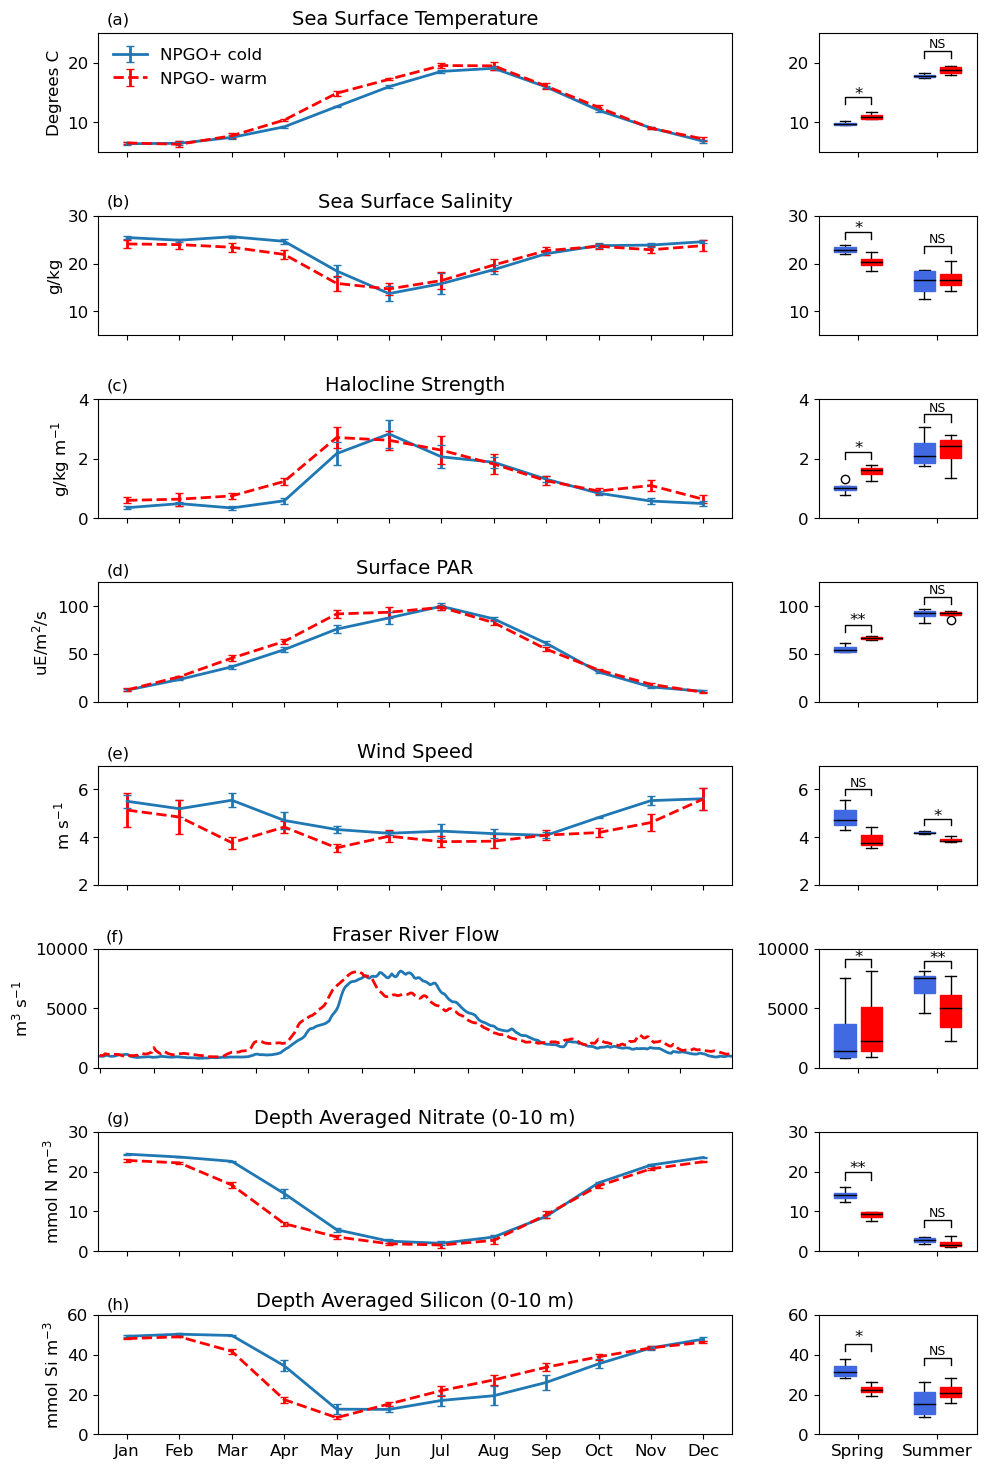

In [68]:
fig, ax = plt.subplots(8,2,figsize=(10, 15),gridspec_kw={'width_ratios': [4, 1]})
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]
border = 0.25

fig.tight_layout(pad=2.5)
c='k'

### SST

ax[0,0].errorbar(xticks, NPGO_C_SST, yerr= NPGO_C_SST_SEM, capsize=3,label='NPGO+ cold',linewidth=2)
ax[0,0].errorbar(xticks, NPGO_W_SST,yerr= NPGO_W_SST_SEM, capsize=3,linestyle='--',label='NPGO- warm',color='r',linewidth=2)
ax[0,0].set_title('Sea Surface Temperature',fontsize=14)
ax[0,0].legend(frameon=False,fontsize=12,loc=2)
ax[0,0].set_ylim(5,25)
ax[0,0].set_ylabel('Degrees C',fontsize=12)
ax[0,0].xaxis.set_tick_params(labelsize=12)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_xticklabels([])
ax[0,0].text(-.4, 26.5, '(a)', fontsize=12,  color='k')

#ax[0,1].bp1 = color_boxplot(Spring_C_SST, 'royalblue', [1])
ax[0,1].boxplot(Spring_C_SST,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[0,1].boxplot(Spring_W_SST,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[0,1].boxplot(Summer_C_SST,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[0,1].boxplot(Summer_W_SST,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[0,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[0,1].set_ylim(5,25)
ax[0,1].set_ylabel('', fontsize=12)
ax[0,1].xaxis.set_tick_params(labelsize=12)
ax[0,1].yaxis.set_tick_params(labelsize=12)
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
## To indicate significance
ax[0,1].plot([1,1, 1.5, 1.5], [13, 14.25, 14.25, 13], linewidth=1, color='k')
ax[0,1].text(1.25, 13.5, "*", ha='center', va='bottom', color='k',fontsize=12)
ax[0,1].plot([2.5,2.5, 3, 3], [20.75, 22, 22, 20.75], linewidth=1, color='k')
ax[0,1].text(2.75, 22, "NS", ha='center', va='bottom', color='k',fontsize=9)

### SSS

ax[1,0].errorbar(xticks, NPGO_C_Sal, yerr= NPGO_C_Sal_SEM, capsize=3,label='NPGO+ coldest',linewidth=2)
ax[1,0].errorbar(xticks, NPGO_W_Sal,yerr= NPGO_W_Sal_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r',linewidth=2)
ax[1,0].set_title('Sea Surface Salinity',fontsize=14)
ax[1,0].legend((),frameon=False)
ax[1,0].set_ylim(5,30)
ax[1,0].set_ylabel('g/kg',fontsize=12)
ax[1,0].xaxis.set_tick_params(labelsize=12)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_xticklabels([])
ax[1,0].text(-.4, 32, '(b)', fontsize=12,  color='k')


ax[1,1].boxplot(Spring_C_Sal,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[1,1].boxplot(Spring_W_Sal,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[1,1].boxplot(Summer_C_Sal,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[1,1].boxplot(Summer_W_Sal,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[1,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[1,1].set_ylim(5,30)
ax[1,1].set_ylabel('',fontsize=12)
ax[1,1].xaxis.set_tick_params(labelsize=12)
ax[1,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[1,1].plot([1,1, 1.5, 1.5], [25.25, 26.75, 26.75, 25.25], linewidth=1, color='k')
ax[1,1].text(1.25, 26, "*", ha='center', va='bottom', color='k',fontsize=12)
ax[1,1].plot([2.5,2.5, 3, 3], [22.25, 23.75, 23.75, 22.25], linewidth=1, color='k')
ax[1,1].text(2.75, 23.75, "NS", ha='center', va='bottom', color='k',fontsize=9)


### Halocline Strength
ax[2,0].errorbar(xticks, NPGO_C_Halo, yerr= NPGO_C_Halo_SEM, capsize=3,label='NPGO+ coldest',linewidth=2)
ax[2,0].errorbar(xticks, NPGO_W_Halo,yerr= NPGO_W_Halo_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r',linewidth=2)
ax[2,0].set_title('Halocline Strength',fontsize=14)
ax[2,0].legend((),frameon=False,loc=1)
ax[2,0].set_ylim(0,4)
ax[2,0].set_ylabel('g/kg m$^{-1}$',fontsize=12)
#ax.invert_yaxis()
ax[2,0].xaxis.set_tick_params(labelsize=12)
ax[2,0].yaxis.set_tick_params(labelsize=12)
ax[2,0].set_xticklabels([])
ax[2,0].text(-.4, 4.3, '(c)', fontsize=12,  color='k')

ax[2,1].boxplot(Spring_C_Halo,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[2,1].boxplot(Spring_W_Halo,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[2,1].boxplot(Summer_C_Halo,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[2,1].boxplot(Summer_W_Halo,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[2,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[2,1].set_ylim(0,4)
ax[2,1].set_ylabel('',fontsize=12)
ax[2,1].xaxis.set_tick_params(labelsize=12)
ax[2,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[2,1].plot([1,1, 1.5, 1.5], [2, 2.24, 2.24, 2], linewidth=1, color='k')
ax[2,1].text(1.25, 2.1, "*", ha='center', va='bottom', color='k',fontsize=12)
ax[2,1].plot([2.5,2.5, 3, 3], [3.25, 3.49, 3.49, 3.25], linewidth=1, color='k')
ax[2,1].text(2.75, 3.5, "NS", ha='center', va='bottom', color='k',fontsize=9)

### Surface PAR

ax[3,0].errorbar(xticks, NPGO_C_PAR, yerr= NPGO_C_PAR_SEM, capsize=3,label='NPGO+ coldest',linewidth=2)
ax[3,0].errorbar(xticks, NPGO_W_PAR,yerr= NPGO_W_PAR_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r',linewidth=2)
ax[3,0].set_title('Surface PAR',fontsize=14)
ax[3,0].legend((),frameon=False)
ax[3,0].set_ylim(0,125)
ax[3,0].set_ylabel('uE/m$^{2}$/s',fontsize=12)
ax[3,0].xaxis.set_tick_params(labelsize=12)
ax[3,0].yaxis.set_tick_params(labelsize=12)
ax[3,0].set_xticklabels([])
ax[3,0].text(-.4, 133, '(d)', fontsize=12,  color='k')


ax[3,1].boxplot(Spring_C_PAR,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[3,1].boxplot(Spring_W_PAR,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[3,1].boxplot(Summer_C_PAR,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[3,1].boxplot(Summer_W_PAR,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[3,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[3,1].set_ylim(0,125)
ax[3,1].set_ylabel('',fontsize=12)
ax[3,1].xaxis.set_tick_params(labelsize=12)
ax[3,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[3,1].plot([1,1, 1.5, 1.5], [72.5, 80, 80, 72.5], linewidth=1, color='k')
ax[3,1].text(1.25, 78, "**", ha='center', va='bottom', color='k',fontsize=12)
ax[3,1].plot([2.5,2.5, 3, 3], [102.5, 110, 110, 102.5], linewidth=1, color='k')
ax[3,1].text(2.75, 110, "NS", ha='center', va='bottom', color='k',fontsize=9)

### Wind Speed


ax[4,0].errorbar(xticks, NPGO_C_Wind, yerr= NPGO_C_Wind_SEM, capsize=3,label='NPGO+ coldest',linewidth=2)
ax[4,0].errorbar(xticks, NPGO_W_Wind,yerr= NPGO_W_Wind_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r',linewidth=2)
ax[4,0].set_title('Wind Speed',fontsize=14)  #(with 2015)
ax[4,0].legend((),frameon=False)
ax[4,0].set_ylim(2,7)
ax[4,0].set_ylabel('m s$^{-1}$',fontsize=12)
ax[4,0].xaxis.set_tick_params(labelsize=12)
ax[4,0].yaxis.set_tick_params(labelsize=12)
ax[4,0].set_xticklabels([])
ax[4,0].text(-.4, 7.3, '(e)', fontsize=12,  color='k')


ax[4,1].boxplot(Spring_C_Wind,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[4,1].boxplot(Spring_W_Wind,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[4,1].boxplot(Summer_C_Wind,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[4,1].boxplot(Summer_W_Wind,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[4,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[4,1].set_ylim(2,7)
ax[4,1].set_ylabel('')
ax[4,1].xaxis.set_tick_params(labelsize=12)
ax[4,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[4,1].plot([1,1, 1.5, 1.5], [5.75, 6, 6, 5.75], linewidth=1, color='k')
ax[4,1].text(1.25, 6, "NS", ha='center', va='bottom', color='k',fontsize=9)
ax[4,1].plot([2.5,2.5, 3, 3], [4.5, 4.75, 4.75, 4.5], linewidth=1, color='k')
ax[4,1].text(2.75, 4.55, "*", ha='center', va='bottom', color='k',fontsize=12)


### Fraser River Flow

ax[5,0].plot(NPGO_C_FR_Index,NPGO_C_FR, linestyle='-',label='Cold Years',linewidth=2);
ax[5,0].plot(NPGO_W_FR_Index,NPGO_W_FR, color='r',linestyle='--',label='Warm Years',linewidth=2);
ax[5,0].set_title('Fraser River Flow',fontsize=14)
ax[5,0].legend((),frameon=False,bbox_to_anchor=(1, 1))
ax[5,0].set_ylim(0,10000)
ax[5,0].set_ylabel('m$^{3}$ s$^{-1}$',fontsize=12)
#ax.set_xlabel('Day of Year',fontsize=14)
ax[5,0].set_xlim(0,365)
ax[5,0].xaxis.set_tick_params(labelsize=12)
ax[5,0].yaxis.set_tick_params(labelsize=12)
ax[5,0].set_xticks([1,32,60,91,121,152,182,213,244,274,305,335])
#ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=12)
ax[5,0].set_xticklabels([])
ax[5,0].text(4, 10600, '(f)', fontsize=12,  color='k')


ax[5,1].boxplot(Spring_C_FR,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[5,1].boxplot(Spring_W_FR,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[5,1].boxplot(Summer_C_FR,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[5,1].boxplot(Summer_W_FR,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[5,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[5,1].set_ylim(0,10000)
ax[5,1].set_ylabel('',fontsize=12)
ax[5,1].xaxis.set_tick_params(labelsize=12)
ax[5,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[5,1].plot([1,1, 1.5, 1.5], [8500, 9100, 9100, 8500], linewidth=1, color='k')
ax[5,1].text(1.25, 8700, "*", ha='center', va='bottom', color='k',fontsize=12)
ax[5,1].plot([2.5,2.5, 3, 3], [8400, 9000, 9000, 8400], linewidth=1, color='k')
ax[5,1].text(2.75, 8600, "**", ha='center', va='bottom', color='k',fontsize=12)



## Nitrate

ax[6,0].errorbar(xticks, NPGO_C_N, yerr= NPGO_C_N_SEM, capsize=3,label='NPGO+ coldest',linewidth=2)
ax[6,0].errorbar(xticks, NPGO_W_N,yerr= NPGO_W_N_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r',linewidth=2)
ax[6,0].set_title('Depth Averaged Nitrate (0-10 m)',fontsize=14)
ax[6,0].legend((),frameon=False)
ax[6,0].set_ylim(0,30)
ax[6,0].set_ylabel('mmol N m$^{-3}$',fontsize=12)
ax[6,0].xaxis.set_tick_params(labelsize=12)
ax[6,0].yaxis.set_tick_params(labelsize=12)
ax[6,0].set_xticklabels([])
ax[6,0].text(-.4, 32, '(g)', fontsize=12,  color='k')


ax[6,1].boxplot(Spring_C_N,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[6,1].boxplot(Spring_W_N,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[6,1].boxplot(Summer_C_N,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[6,1].boxplot(Summer_W_N,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[6,1].set(xticks=[1.25,2.75], xticklabels=['',''])
ax[6,1].set_ylim(0,30)
ax[6,1].set_ylabel('',fontsize=12)
ax[6,1].xaxis.set_tick_params(labelsize=12)
ax[6,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[6,1].plot([1,1, 1.5, 1.5], [18, 19.8, 19.8, 18], linewidth=1, color='k')
ax[6,1].text(1.25, 19, "**", ha='center', va='bottom', color='k',fontsize=12)
ax[6,1].plot([2.5,2.5, 3, 3], [6, 7.8, 7.8, 6], linewidth=1, color='k')
ax[6,1].text(2.75, 8, "NS", ha='center', va='bottom', color='k',fontsize=9)


## Silicon
ax[7,0].errorbar(xticks, NPGO_C_Si, yerr= NPGO_C_Si_SEM, capsize=3,label='NPGO+ coldest',linewidth=2)
ax[7,0].errorbar(xticks, NPGO_W_Si,yerr= NPGO_W_Si_SEM, capsize=3,linestyle='--',label='NPGO- warmest',color='r',linewidth=2)
ax[7,0].set_title('Depth Averaged Silicon (0-10 m)',fontsize=14)
ax[7,0].legend((),frameon=False)
ax[7,0].set_ylim(0,60)
ax[7,0].set_ylabel('mmol Si m$^{-3}$',fontsize=12)
ax[7,0].xaxis.set_tick_params(labelsize=12)
ax[7,0].yaxis.set_tick_params(labelsize=12)
#ax.set_xticklabels([])
ax[7,0].text(-.4, 63, '(h)', fontsize=12,  color='k')

ax[7,1].boxplot(Spring_C_Si,positions=[1], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[7,1].boxplot(Spring_W_Si,positions=[1.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[7,1].boxplot(Summer_C_Si,positions=[2.5], patch_artist=True,showmeans=False,boxprops=dict(facecolor='royalblue',color='royalblue'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[7,1].boxplot(Summer_W_Si,positions=[3], patch_artist=True,showmeans=False,boxprops=dict(facecolor='r',color='r'),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),\
                medianprops=dict(color=c),widths=0.4)
ax[7,1].set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax[7,1].set_ylim(0,60)
ax[7,1].set_ylabel('',fontsize=12)
ax[7,1].xaxis.set_tick_params(labelsize=12)
ax[7,1].yaxis.set_tick_params(labelsize=12)
## To indicate significance
ax[7,1].plot([1,1, 1.5, 1.5], [42, 45.6, 45.6, 42], linewidth=1, color='k')
ax[7,1].text(1.25, 45, "*", ha='center', va='bottom', color='k',fontsize=12)
ax[7,1].plot([2.5,2.5, 3, 3], [35, 38.6, 38.6, 35], linewidth=1, color='k')
ax[7,1].text(2.75, 38.5, "NS", ha='center', va='bottom', color='k',fontsize=9)


#plt.savefig('Fig4_Drivers_revised.png', bbox_inches='tight',dpi=1000,transparent=False)

#plt.show()